# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

#### Common import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [3]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [4]:
df.head()

,x1,x2,x3
0,-0.973721,7.512734,-12.876199
1,-3.531086,4.072012,-3.201755
2,1.006584,6.021601,-2.076443
3,-1.626755,0.585321,0.184346
4,0.429908,8.418979,-11.762553


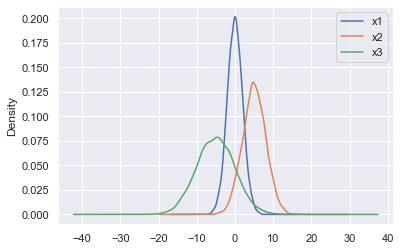

In [5]:
# plotting data

df.plot.kde()

In [6]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [7]:
data_tf = standardscaler.fit_transform(df)

In [8]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

In [9]:
df.head()

,x1,x2,x3
0,-0.484102,0.820403,-1.585956
1,-1.763759,-0.317099,0.372703
2,0.506805,0.327435,0.600530
3,-0.810868,-1.469798,1.058242
4,0.218247,1.120008,-1.360490


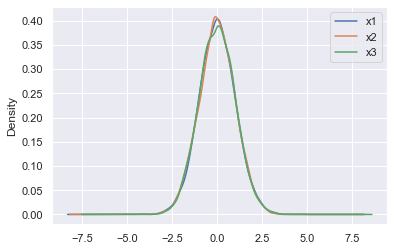

In [10]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [11]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [12]:
df.head()

,x1,x2,x3
0,5.113429,36.744647,44.696879
1,3.784443,37.741568,56.004840
2,7.554278,35.466951,51.425075
3,4.471778,35.647062,47.837088
4,16.694547,23.214160,45.545442


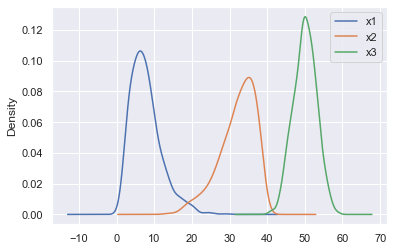

In [13]:
df.plot.kde()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

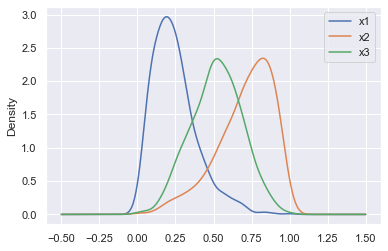

In [16]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [17]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

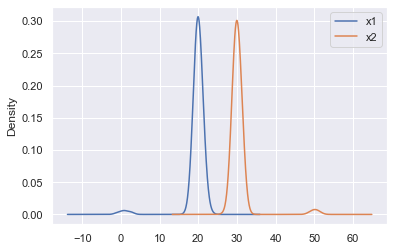

In [18]:
df.plot.kde()

In [19]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [20]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

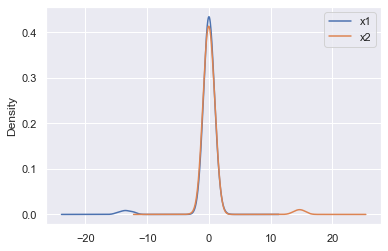

In [21]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [22]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

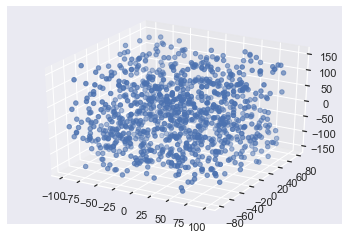

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [26]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

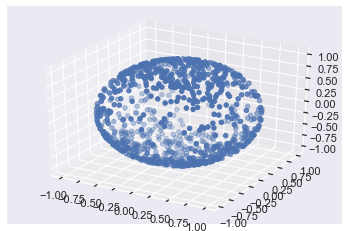

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [28]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [29]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [30]:
data_tf = binarizer.fit_transform(X)

In [31]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [32]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [33]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [34]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [35]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [36]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [38]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [39]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [40]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [41]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [42]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [78]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [79]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)

In [80]:
pol.fit_transform(df)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [47]:
from sklearn.preprocessing import FunctionTransformer

In [48]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [49]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [50]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [51]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [52]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [54]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [55]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [56]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [57]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [58]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

In [59]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [60]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [62]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [63]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [64]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [65]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [66]:
from skimage.io import imread,imshow

In [67]:
image = imread('fish.jpg')

In [68]:
image.shape

(4016, 6016, 3)

In [69]:
image[0]

Array([[ 51,  92, 114],
       [ 62, 103, 125],
       [ 52,  93, 115],
       ...,
       [  0,  44,  71],
       [  5,  55,  80],
       [  0,  46,  71]], dtype=uint8)

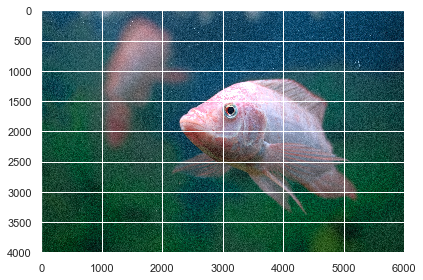

In [70]:
imshow(image)

In [71]:
from skimage.color import rgb2gray

In [72]:
rgb2gray(image).shape

(4016, 6016)

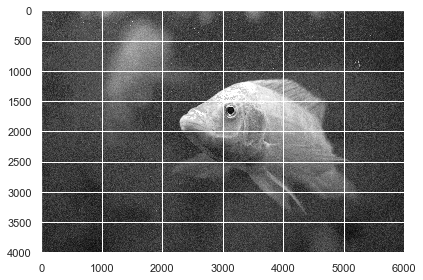

In [73]:
imshow(rgb2gray(image))

In [74]:
from skimage.transform import resize

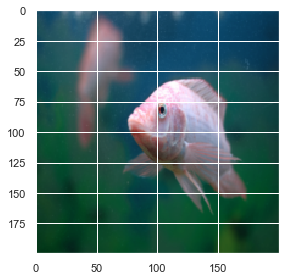

In [75]:
imshow(resize(image, (200,200)))